In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# Escaneo de imágenes desde carpetas y guardado en CSV
X = []
y = []
image_size = (28, 28)  # Tamaño de la imagen (28x28 píxeles)
data_dir = "dataset/"

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if not os.path.isdir(label_path):
        continue

    for filename in os.listdir(label_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(label_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize(image_size)
            img_array = np.array(img).flatten()
            X.append(img_array)
            y.append(int(label))

X = np.array(X)
y = np.array(y)

# Guardar como CSV
df = pd.DataFrame(X)
df["label"] = y
df.to_csv("datos_imagenes.csv", index=False)
print("Datos guardados en datos_imagenes.csv")


Datos guardados en datos_imagenes.csv


In [2]:
import pandas as pd

# Cargar los datos desde el CSV guardado
df = pd.read_csv("datos_imagenes.csv")
X = df.drop("label", axis=1).values
y = df["label"].values
print("Datos cargados desde datos_imagenes.csv")


Datos cargados desde datos_imagenes.csv


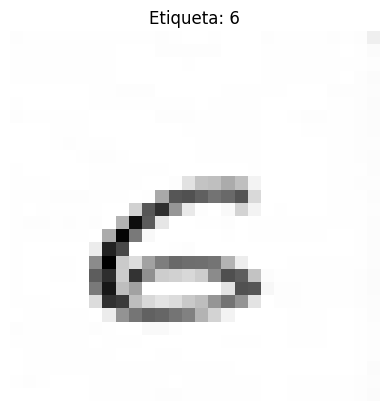

In [13]:
import matplotlib.pyplot as plt
import random

# Seleccionar índice aleatorio
idx = random.randint(0, len(X) - 1)
image = X[idx].reshape(28, 28)
label = y[idx]

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()


In [5]:
import os
import numpy as np
from PIL import Image

# Cargar y procesar imágenes personalizadas
X = []
y = []
image_size = (28, 28)
data_dir = "dataset/"  # Asegúrate de que esta ruta sea correcta

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if not os.path.isdir(label_path):
        continue

    for filename in os.listdir(label_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(label_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize(image_size)
            img_array = np.array(img).flatten()
            X.append(img_array)
            y.append(int(label))

X = np.array(X)
y = np.array(y)


In [6]:
#### Tarea1
#### Este script incluye la implementación del árbol de decisión para el reconocimiento de dígitos.
#### Utiliza las siguientes bibliotecas: CSV, Numpy, Sklearn y Math.
### @Autor: Chaitanya Sri Krishna Lolla, ID de Estudiante: 800960353

## Libaries 
import csv
import numpy as np
from sklearn import tree
import math
from sklearn.metrics import accuracy_score

## Forma los datos de entrada de entrenamiento en la variable X.
## Forma el valor objetivo de entrenamiento en la variable Y.
X=[]
Y=[]

## Toma el archivo CSV de entrenamiento usando la biblioteca CSV y forma los datos de entrada y salida de entrenamiento X.
with open('datos_imagenes.csv') as trainingFile:
    reader = csv.reader(trainingFile)
    
    for row in reader:
        X.append(row[:64])
        Y.append(row[64])

## Para realizar algún tipo de pruning y evitar el overfitting, la lógica a continuación divide los datos de entrenamiento dados en 70% de datos de entrenamiento 
## 30% de Validation Dataset. 
## Luego la clasificación se realiza sobre el 70% de los datos de entrenamiento y se valida en el Validation Dataset.


percentage_training = 0.7
length_TrainingSet = len(X)
len_train = math.floor(length_TrainingSet * percentage_training);
    
X_train = X[:len_train]
Y_train = Y[:len_train]
    
X_validation = X[len_train:len(X)]
Y_validation = Y[len_train:len(X)]


## Clasificación en el conjunto de datos de entrenamiento anterior.
clf = tree.DecisionTreeClassifier(max_depth= 11);
clf = clf.fit(X_train, Y_train)
print("Done Classifying");

## Checking the accuracy of training on the given training set to verify the classification.
output_predicted_Training = clf.predict(X_train);

accuracy = accuracy_score(Y_train, output_predicted_Training)
print("Verificación: La precisión de la predicción en el conjunto de datos de entrenamiento:")
print(accuracy*100)


## Comprobando la precisión del entrenamiento en el conjunto de entrenamiento dado para verificar la clasificación.
output_predicted_validation = clf.predict(X_validation);

accuracy_validation = accuracy_score(Y_validation, output_predicted_validation);
print("Validación: La precisión de la predicción en el conjunto de datos de validación formado.")
print(accuracy_validation*100);


### Formation of the given Test Dataset and verifying it using the above classifier trained.
## Formation of Testing Data:

X_test = []
Y_test = []
with open('datos_imagenes.csv') as testingFile:
    testReader = csv.reader(testingFile)
    
    for row in testReader:
        X_test.append(row[:64])
        Y_test.append(row[64])
        
output_predicted_test = clf.predict(X_test);
accuracy_test = accuracy_score(Y_test, output_predicted_test);
print("Prueba: La precisión de la predicción en el conjunto de datos de prueba proporcionado:")
print(accuracy_test*100);


Done Classifying
Verificación: La precisión de la predicción en el conjunto de datos de entrenamiento:
94.08178143018092
Validación: La precisión de la predicción en el conjunto de datos de validación formado.
79.77423844131746
Prueba: La precisión de la predicción en el conjunto de datos de prueba proporcionado:
89.78938578586009


Datos guardados en datos_imagenes.csv


In [7]:

# División 60/20/20 y contador de imágenes desde el CSV generado

import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar datos desde el CSV generado previamente
df = pd.read_csv("datos_imagenes.csv")
X = df.drop("label", axis=1).values
y = df["label"].values

# Contar total de imágenes procesadas
print("Total de imágenes procesadas:", len(X))

# División de datos
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

print(f"Entrenamiento: {len(X_train)}")
print(f"Validación: {len(X_val)}")
print(f"Prueba: {len(X_test)}")


Total de imágenes procesadas: 21555
Entrenamiento: 12933
Validación: 4311
Prueba: 4311
